# Olympics

### A1 - Leer Datasets 
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

### Obtener y leer los ficheros csv en dataframes de pandas

#### Función que corrige el error en el archivo results.csv que contiene filas con 9 columnas de información, teniendo que ser 8.

In [31]:
def fix_error_csv(input_file, output_file):
    """
    Lee el archivo CSV de entrada 'input_file', corrige los registros que tienen más de 8 campos y
    guarda el resultado en un nuevo archivo CSV 'output_file'. Si una línea tiene menos de 2 campos, 
    se omite en el archivo de salida.
    
    Param input_file: El nombre del archivo CSV de entrada.
    Type input_file: str
    
    Param output_file: El nombre del archivo CSV de salida.
    Type output_file: str
    
    return: None
    """
    with open(input_file, "r", encoding = "utf-8") as f_in, open(output_file, "w", newline = '', encoding = "utf-8") as f_out:
        for line in f_in:
            fields = line.strip().split(",")
            while len(fields) > 8:
                f_out.write(",".join(fields[:8]) + "\n")
                fields = fields[8:]
            if len(fields) > 1:
                f_out.write(",".join(fields) + "\n")

#### Obtener la información a partir de los archivos csv

In [32]:
import pandas as pd
import os

path_athlete_events = os.path.join("res", "athlete_events.csv")
print(path_athlete_events)
path_results = os.path.join("res", "results.csv")
print(path_results)

input_file = f"{path_results}"
output_file = os.path.join(os.path.dirname(input_file), "results_fixed.csv")

fix_error_csv(input_file, output_file)
df_athlete_events = pd.read_csv(path_athlete_events)
df_results = pd.read_csv(output_file)

display(df_athlete_events.head())
display(df_results.head())

res\athlete_events.csv
res\results.csv


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77


### A2 - Análisis
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais


## Evolución del número de deportes por año

##### COMENTARIO: se usan los juegos olímpicos de verano ya que observando los años de las gráficas de ejemplo y buscando por internet, coincide que esos años son de olimpiadas de verano

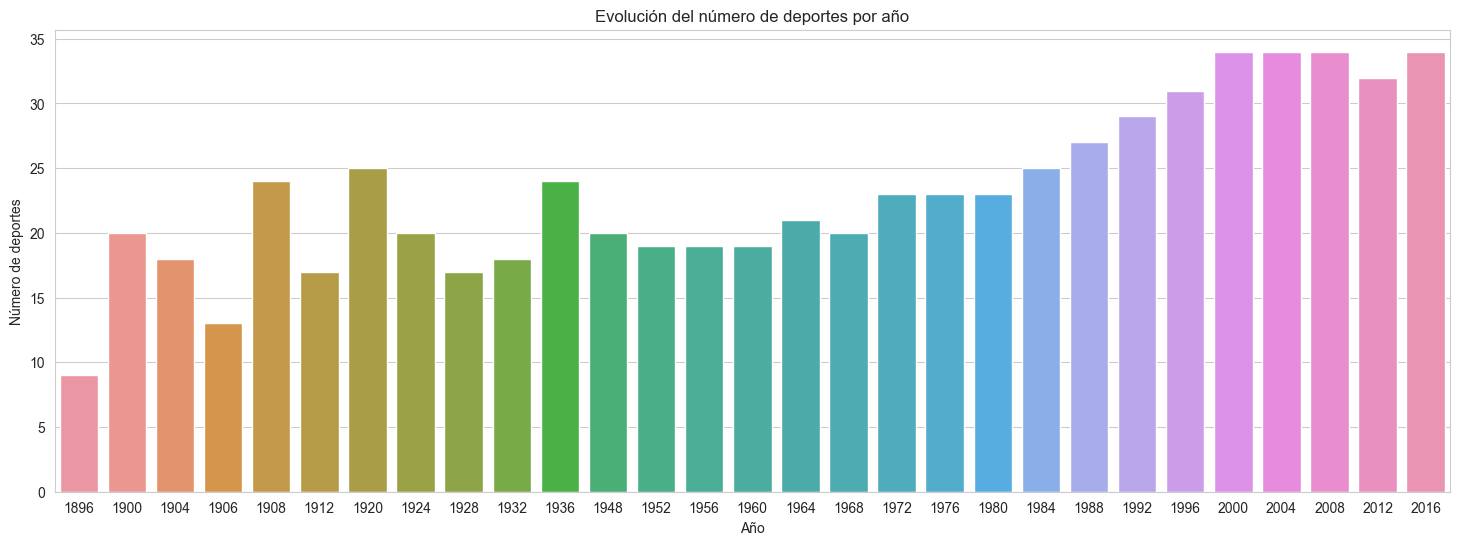

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtro los juegos olímpicos de verano
df_summer_games = df_athlete_events[df_athlete_events["Season"] == "Summer"]

# Agrupo los datos por año y cuento el número de deportes únicos en cada año
sports_per_year = df_summer_games.groupby("Year")["Sport"].nunique().reset_index()

# Gráfico de barras 
plt.figure(figsize = (18, 6))
sns.barplot(x = "Year", y = "Sport", data = sports_per_year)

# Título del gráfico y nombre de los ejes 
plt.title("Evolución del número de deportes por año")
plt.xlabel("Año")
plt.ylabel("Número de deportes")
plt.show()

## Evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo

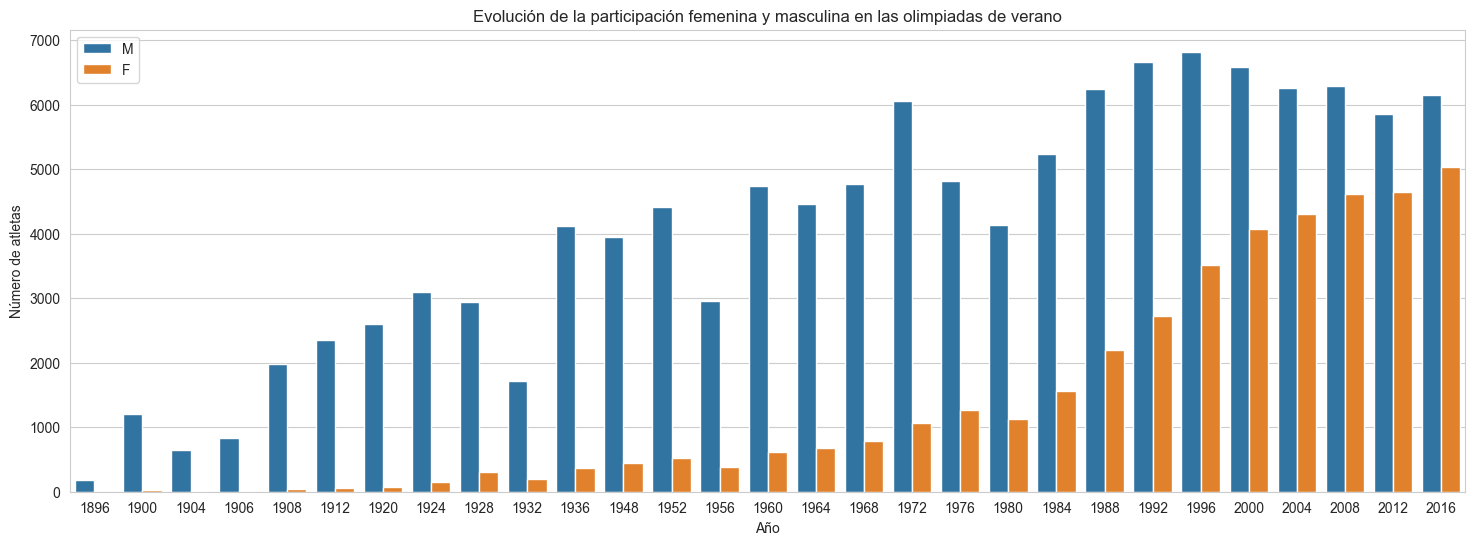

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_summer_games = df_athlete_events[df_athlete_events["Season"] == "Summer"]

df_gender_count = df_summer_games.groupby(["Year", "Sex"])["ID"].nunique().reset_index()

# Gráfico de barras
plt.figure(figsize = (18, 6))
sns.barplot(x = "Year", y = "ID", hue = "Sex", data = df_gender_count)

# Título y etiquetas de los ejes
plt.title("Evolución de la participación femenina y masculina en las olimpiadas de verano")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.legend(loc = "upper left")
plt.show()

## 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais

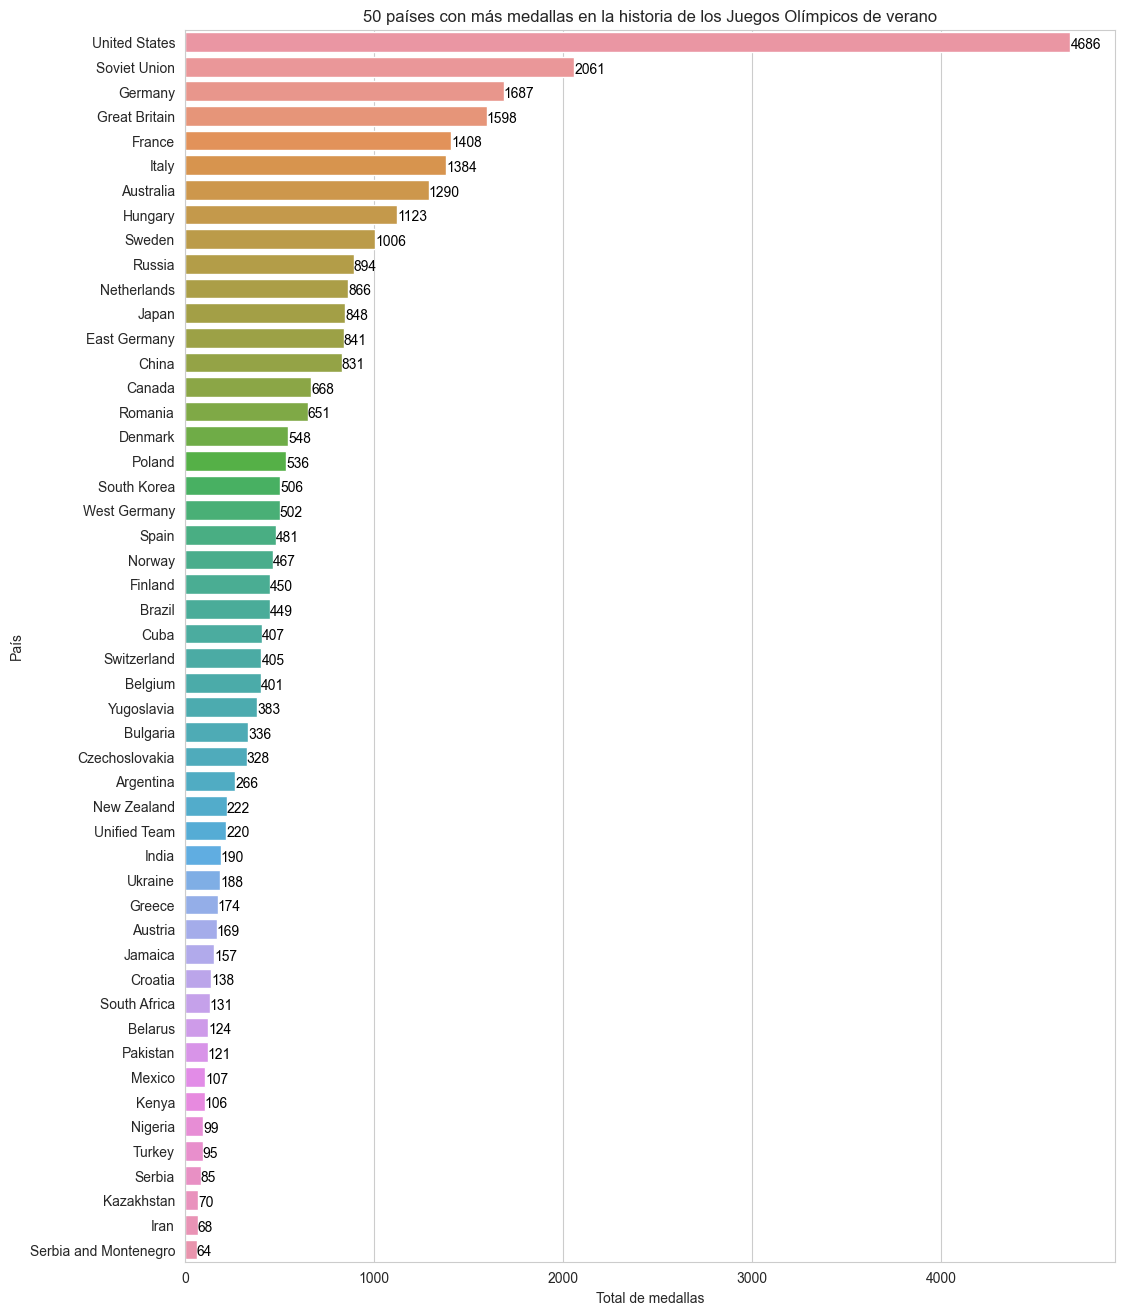

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_summer_games = df_athlete_events[df_athlete_events["Season"] == "Summer"]

# Saco el total de medallas por país
medal_counts = df_summer_games.groupby("Team")["Medal"].count().reset_index(name = "Total Medals")

# Filtro los 50 países con más medallas
top_50_medal_counts = medal_counts.nlargest(50, "Total Medals")

# Gráfico con Seaborn
sns.set_style("whitegrid", {"ytick.major.grid": True})
plt.figure(figsize = (12, 16))
sns.barplot(x = "Total Medals", y = "Team", data = top_50_medal_counts)
plt.title("50 países con más medallas en la historia de los Juegos Olímpicos de verano", fontsize = 12)
plt.xlabel("Total de medallas")
plt.ylabel("País")

# Agrego las cantidades de medallas al final de cada barra
for index, value in enumerate(top_50_medal_counts["Total Medals"]):
    plt.text(value + 0.5, index + 0.25, str(value), color = "black", fontsize = 10)

plt.show()

### A3 - Machine Learning

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

#### Se crea una función para obtener los apellidos de los atletas a partir del archivo athlete_events.csv para tener una columna que coincida con el dataframe de results.csv y así porder hacer el merge


In [36]:
def obtener_apellido(nombre):
    """Extrae el apellido de una cadena que contiene un nombre completo.

    Args: nombre (str): Cadena que contiene un nombre completo, que puede incluir una o varias palabras o una o varias palabras entre paréntesis.

    Returns: str: El apellido que se encuentra en la cadena de entrada, o una cadena vacía si no se encuentra el apellido.
    """
    pattern = re.compile(r"\([^\)]*\)") # Expresión regular para buscar las palabras entre paréntesis
    parentesis = pattern.findall(nombre)
    if parentesis:
        palabras = nombre.replace(parentesis[-1], "").split()
    else:
        palabras = nombre.split()
    for i in range(len(palabras)-1, -1, -1):
        if palabras[i] not in parentesis:
            return palabras[i]
    return ''

#### Paso 1 - Preparación de los datos. Acá filtramos por los datos solamente del deporte atletismo, 100 m lisos para hombres y mujeres. Luego Quitamos columnas que no son importantes para entrenar nuestro modelo, agregamos nuevas columnas de nombre completo para poder hacer el merge entre ambos dataframes. 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

df_athlete_events_copy = df_athlete_events.copy()
df_results_copy = df_results.copy()

df_100_m_athletes = df_athlete_events_copy[(df_athlete_events_copy["Event"] == "Athletics Men's 100 metres") | (df_athlete_events_copy["Event"] == "Athletics Women's 100 metres")]
df_100_m_athletes = df_100_m_athletes.drop(["ID", "Team", "Games", "Year", "Season", "Medal", "City", "Sport", "Event", "NOC"], axis = 1)
df_100_m_athletes["Name"] = df_100_m_athletes["Name"].str.lower()
df_100_m_athletes[["Height", "Weight"]] = df_100_m_athletes[["Height", "Weight"]].fillna(value = 0)
df_100_m_athletes["First_Name"] = df_100_m_athletes["Name"].apply(lambda x: x.split()[0])
df_100_m_athletes["Last_Name"] = df_100_m_athletes["Name"].apply(obtener_apellido)
df_100_m_athletes["Name_Full"] = df_100_m_athletes["First_Name"] + " " + df_100_m_athletes["Last_Name"]
df_100_m_athletes = df_100_m_athletes.drop(["Name", "First_Name", "Last_Name"], axis = 1)
display(df_100_m_athletes.head())

df_100_m_results = df_results_copy[(df_results_copy["Event"] == "100M Men") | (df_results_copy["Event"] == "100M Women")]
df_100_m_results = df_100_m_results.drop(["Location", "Year", "Medal", "Event", "Nationality"], axis = 1)
df_100_m_results["Name"] = df_100_m_results["Name"].str.lower()
df_100_m_results[["Result"]] = df_100_m_results[["Result"]].fillna(value = 0)
display(df_100_m_results.head())

,Sex,Age,Height,Weight,Name_Full
26,F,18.0,168.0,0.0,cornelia aalten
203,M,18.0,168.0,60.0,carlos balladares
215,M,26.0,0.0,0.0,gana kimet
257,M,22.0,181.0,74.0,ruslan abbasov
315,M,23.0,169.0,68.0,younis rabee


,Gender,Name,Result
69,M,usain bolt,9.81
70,M,justin gatlin,9.89
71,M,andre de grasse,9.91
72,M,usain bolt,9.69
73,M,richard thompson,9.89


#### Paso 2 - Selecciono las columnas relevantes y hago el merge con los datos que coinciden en la columna Name y al final del dataframe agrego los que no tienen ninguna coincidencia mediante "outer". Además hago el mapeo para codificar la columna Gender y que de esta manera el modelo comprenda el sexo en 1 y 0 porque no entiende con strings.

In [38]:
df_merged = df_100_m_athletes.merge(df_100_m_results, left_on = "Name_Full", right_on = "Name", how = "outer")
df_merged["Gender_new"] = df_merged.apply(lambda x: x["Gender"] if not pd.isna(x["Gender"]) else x["Sex"], axis = 1)
df_merged = df_merged.drop(["Name", "Name_Full", "Sex", "Gender"], axis = 1)
df_merged = df_merged.rename(columns = {"Gender_new": "Gender"})
mapping = {"M": 1.0, "F": 0.0, "W": 0.0}
df_merged["Gender"] = df_merged["Gender"].map(mapping)
display(df_merged.sample(5))

,Age,Height,Weight,Result,Gender
1551,21.0,170.0,69.0,12.6,1.0
2775,27.0,170.0,57.0,NaN,0.0
96,28.0,175.0,70.0,NaN,1.0
1416,23.0,167.0,60.0,NaN,1.0
1352,34.0,180.0,78.0,NaN,1.0


#### Paso 3 - Preparo los datos para el modelo eliminando los NaN debido a que solo me sirven para entrenar el modelo las filas que tienen todos los campos de información completo (Age, Height, Weight, Result y Gender).

In [39]:
df_merged.dropna(inplace = True) # Eliminar filas con valores nulos
display(df_merged.sample(15))

,Age,Height,Weight,Result,Gender
2341,16.0,167.0,57.0,12.2,0.0
365,21.0,196.0,95.0,9.63,1.0
181,31.0,165.0,52.0,10.97,0.0
1771,20.0,173.0,59.0,11.6,0.0
596,22.0,182.0,73.0,10.8,1.0
598,25.0,187.0,90.0,10.06,1.0
2462,27.0,172.0,61.0,10.7,1.0
929,29.0,160.0,57.0,10.78,0.0
1630,18.0,178.0,72.0,10.9,1.0
180,27.0,165.0,52.0,10.97,0.0


#### Encontré que aún quedaban datos None por lo que el train_test_split fallaba. Para solucionar ese problema se implementa esta máscara y así eliminar los None que restaban en el dataframe

In [40]:
mask = df_merged["Result"] == "None"
df_merged.drop(df_merged[mask].index, axis = 0, inplace = True)
#display(df_merged)

#### Paso 4 - Divido los datos en conjuntos de entrenamiento y prueba y los transformo en float. Esto lo hago porque el modelo fallaba debido a que las columnas se encontraban con formato strings. 

In [41]:
X = df_merged[["Age", "Height", "Weight", "Gender"]]
y = df_merged["Result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

X_train = X_train.astype("float")
X_test = X_test.astype("float")
y_train = y_train.astype("float")
y_test = y_test.astype("float")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Paso 5 - Armo el modelo de red neuronal

In [42]:
model = Sequential()

model.add(Dense(64, input_shape = (4,), activation = "relu"))
model.add(Dense(32, activation = "tanh"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1))

#### Paso 6 - Entreno el modelo

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(loss = "mse", optimizer = "adam", metrics = ["mae"])
history = model.fit(X_train, y_train, epochs = 500, batch_size = 16, validation_data = (X_test, y_test), callbacks = [EarlyStopping(patience = 15, monitor = "val_loss")])

Epoch 1/500
7/7 [==============================] - 1s 19ms/step - loss: 104.6743 - mae: 10.2136 - val_loss: 99.2675 - val_mae: 9.9466
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 95.5876 - mae: 9.7585 - val_loss: 88.6200 - val_mae: 9.3932
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 84.5290 - mae: 9.1707 - val_loss: 75.8563 - val_mae: 8.6787
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 71.5330 - mae: 8.4232 - val_loss: 61.0016 - val_mae: 7.7612
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 56.4437 - mae: 7.4612 - val_loss: 44.3653 - val_mae: 6.5748
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 39.7072 - mae: 6.2094 - val_loss: 27.3677 - val_mae: 5.0687
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 23.3284 - mae: 4.6420 - val_loss: 13.0294 - val_mae: 3.3249
Epoch 8/500
7/7 [==============================] - 0s 5ms/step - loss: 10.4968 -

#### Paso 7 - Evalúo el modelo graficando las pérdidas

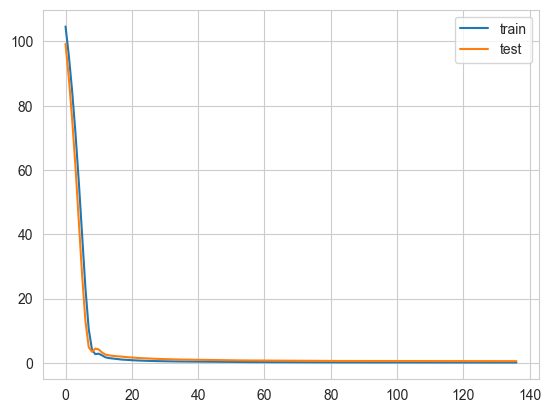

In [44]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.show()

#### Paso 8 - Hago que el programa solicite al usuario ingresar datos para realizar una predicción del tiempo que hará un atleta en una carrera de 100 metros lisos.

In [45]:
print("Ingrese los datos del atleta:")
gender = input("Sexo (M/F): ")
if (gender == "M") | (gender == "m"):
    gender = 1.0
elif (gender == "F") | (gender == "f"):
    gender = 0.0
else:
    print("Ingrese un género válido")
age = float(input("Edad: "))
height = float(input("Altura (cm): "))
weight = float(input("Peso (kg): "))

user_data = np.array([[age, height, weight, gender]])
scaled_user_data = scaler.transform(user_data)
prediction = model.predict(scaled_user_data)

print("Predicción de tiempo en los 100 metros lisos:", prediction)

Ingrese los datos del atleta:


Sexo (M/F):  M
Edad:  19
Altura (cm):  181
Peso (kg):  68


1/1 [==============================] - 0s 45ms/step
Predicción de tiempo en los 100 metros lisos: [[10.832523]]


C:\Users\uri33\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
